<a href="https://colab.research.google.com/github/cdixson-ds/DS-Unit-2-Regression-1/blob/master/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [50]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,2,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,41,-74,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2016-06-12 12:19:27,,Columbus Avenue,41,-74,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,41,-74,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,41,-74,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,41,-74,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
#describe rental price
#the mean baseline is 3,580

pd.options.display.float_format = '{:,.0f}'.format
df['price'].describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

In [0]:
#find mean for price feature in df

guess = df['price'].mean()

In [0]:
errors = guess - df['price']

In [0]:
mean_absolute_error = errors.abs().mean()

In [55]:
#look at the average error when using the mean baseline

print(f'If we guessed every rental price ${guess:,.0f},')
print(f'we would be off by ${mean_absolute_error:,.0f} on average.')

If we guessed every rental price $3,580,
we would be off by $1,202 on average.


In [56]:
#Improve error by using more data, for example the number of bedrooms

import plotly.express as px
px.scatter(df, x='bedrooms', y='price')

In [57]:
#trendline='ols' draws an ordinary least squares regression line
#filling in the gaps is interpolation

#Add a line of best fit for prediction

px.scatter(df, x='bedrooms', y='price', trendline='ols')

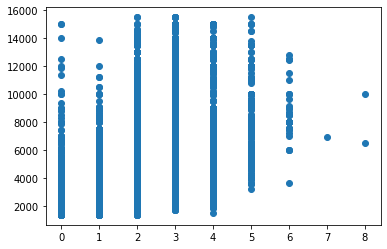

In [58]:
#Use scikit-learn for linear regression with one feature

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['bedrooms'], df['price'])
plt.show()

In [59]:
#Choose model hyperparameters

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#Arrange data into a feature matrix and target vector

X = df['bedrooms'][:, np.newaxis]
X.shape

(48818, 1)

In [61]:
#Fit model to your data

model.fit(X, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#coef_ and intercept_ parameters represent the slope and intercept of the simple linear fit to the data

model.coef_

array([853.25416753])

In [63]:
model.intercept_

2267.9741491780505

In [0]:
#Predict labels for unknown data
#Coerce the xvalues into a [n_samples, n_features] feature matrix

xfit = np.linspace(-1, 11)

In [0]:
#Feed matrix into the model

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

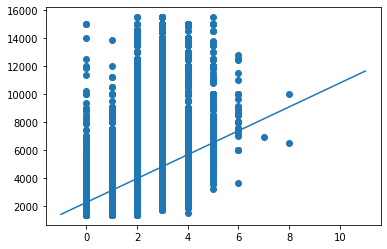

In [66]:
plt.scatter(X,df['price'])

plt.plot(xfit, yfit)
plt.show()

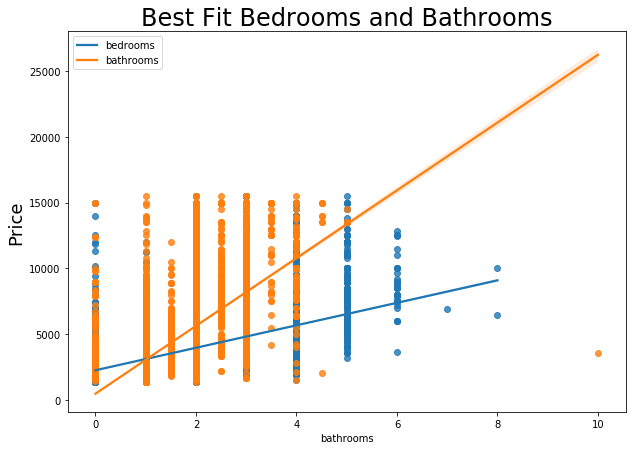

In [67]:
import seaborn as sns

Xd = df['bedrooms']
Yd = df['bathrooms']
Zd = df['price']

fig = plt.figure(figsize=(10,7))

sns.regplot(Xd, Zd)
sns.regplot(Yd, Zd)

plt.legend(labels=['bedrooms', 'bathrooms'])
plt.title('Best Fit Bedrooms and Bathrooms', size=24)
plt.ylabel('Price', size=18)
plt.show()

In [68]:
#Write a function to make new predictions and explain model coefficient
#Should be able to use with other features besides bedroom

x = df['bedrooms']

def predict(x):
  y_pred = model.predict([[x]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.0f} estimated price for {x:,.0f}.'
  explanation = f'In this linear regression, each additional (variable/feature) adds ${coefficient:,.0f}.'
  return result, explanation

predict(1497)

('$1,279,589 estimated price for 1,497.',
 'In this linear regression, each additional (variable/feature) adds $853.')

In [69]:
#More than one feature?

from sklearn import linear_model
import statsmodels.api as sm

X_new = df[['bathrooms', 'bedrooms']]
Y = df['price']

regr = linear_model.LinearRegression()
regr.fit(X_new, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 464.88902434416195
Coefficients: 
 [2099.14867224  385.08418275]


In [0]:
X_new = sm.add_constant(X_new)  #add a constant

In [0]:
model = sm.OLS(Y, X_new).fit()

In [0]:
predictions = model.predict(X_new)


In [73]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                 2.589e+04
Date:                Tue, 11 Feb 2020   Prob (F-statistic):               0.00
Time:                        00:49:29   Log-Likelihood:            -4.1651e+05
No. Observations:               48818   AIC:                         8.330e+05
Df Residuals:                   48815   BIC:                         8.330e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        464.8890     15.240     30.504      0.0

In [0]:
from mpl_toolkits import mplot3d

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

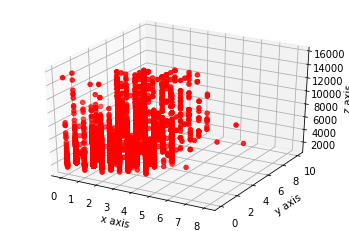

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Xd = df['bedrooms']
Yd = df['bathrooms']
Zd = df['price']

ax.scatter(Xd,Yd,Zd, c='r', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()